In [35]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [36]:
df = pd.read_csv('D:/DATA SCIENCE ZONE/Projects/Accenture_social_buzz_data_analysis/social_buzz_project_files/social_buzz_cleaned_dataset/social_buzz_cleaned_data.csv', index_col= 0)

In [37]:
df

,Content_ID,Reaction_Type,Datetime,Content_Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30
...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology,negative,10
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology,positive,30
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology,negative,12


In [38]:
unique_cat = df.groupby("Category", as_index=False).Score.sum().sort_values(by ="Score", ascending= False)
unique_cat

,Category,Score
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676
2,culture,66579
14,travel,64880
1,cooking,64756
10,soccer,57783
4,education,57436


# Top 5 Categories by Aggregated Score

In [39]:
unique_cat.head(5).reset_index(drop = True)

,Category,Score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676


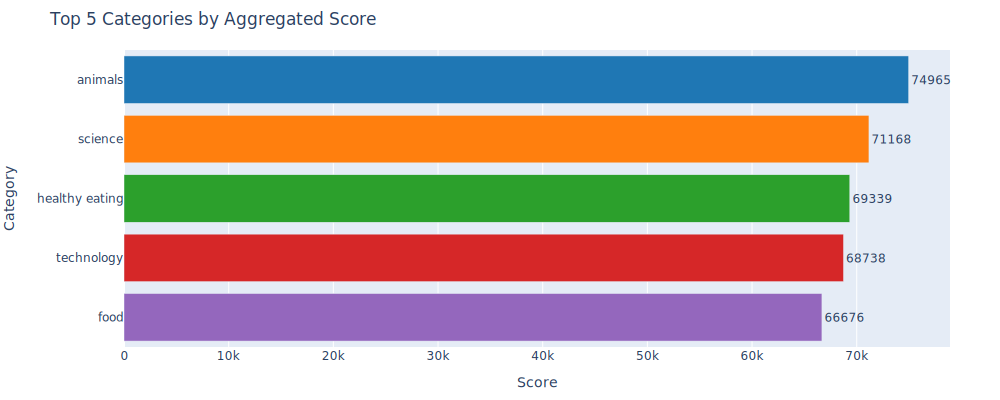

In [40]:
unique_cat_fig = px.bar(unique_cat.head(5), x="Score", y="Category",
                        color="Category",
                        color_discrete_sequence=px.colors.qualitative.D3,
                        text="Score",
                        title="Top 5 Categories by Aggregated Score")
unique_cat_fig.update_traces(textposition="outside")
unique_cat_fig.update_layout(showlegend=False,
                             xaxis_title="Score",
                             yaxis_title="Category",
                             margin=dict(l=50, r=50, t=50, b=50),
                             height=400,
                             width=1000)
unique_cat_fig.show(renderer="svg")

These are all the top 5 categories that people more interested. The top most is **“Animals”**  followed by **“science, healthy eating, technology and food**” 

# Least 5 Categories by Aggregated Score

In [41]:
unique_cat.sort_values(by= 'Score').reset_index(drop = True).head(5)

,Category,Score
0,public speaking,49264
1,veganism,49619
2,tennis,50339
3,dogs,52511
4,studying,54269


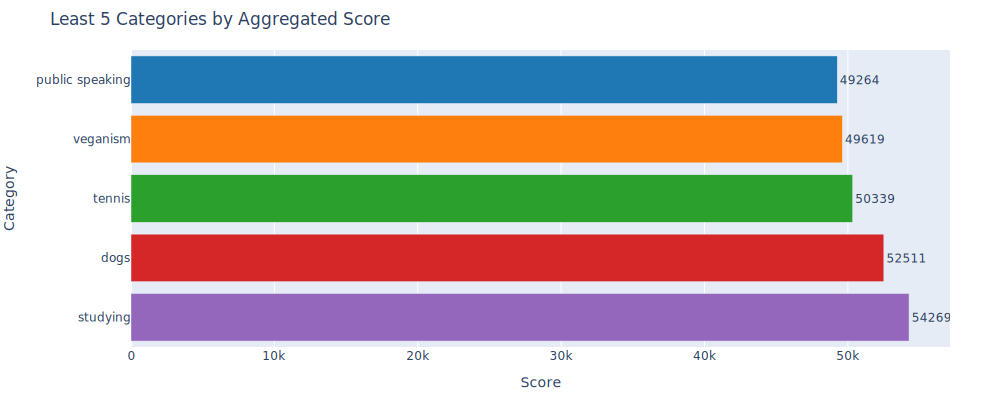

In [42]:
low_unique_cat_fig = px.bar(unique_cat.sort_values(by= 'Score').head(5), x="Score", y="Category",
                        color="Category",
                        color_discrete_sequence=px.colors.qualitative.D3,
                        text="Score",
                        title="Least 5 Categories by Aggregated Score")
low_unique_cat_fig.update_traces(textposition="outside")
low_unique_cat_fig.update_layout(showlegend=False,
                             xaxis_title="Score",
                             yaxis_title="Category",
                             margin=dict(l=50, r=50, t=50, b=50),
                             height=400,
                             width=1000)
low_unique_cat_fig.show(renderer="svg")

These are all the least 5 categories that people not interested as much. The most is **“Public Speaking”**  followed by **“veganism, tennis, dogs and studying”**

# Top Content Type

In [43]:
top_content_type = df.groupby('Content_Type').size().sort_values(ascending = False).reset_index(name='Count')
top_content_type

,Content_Type,Count
0,photo,6589
1,video,6245
2,GIF,6079
3,audio,5660


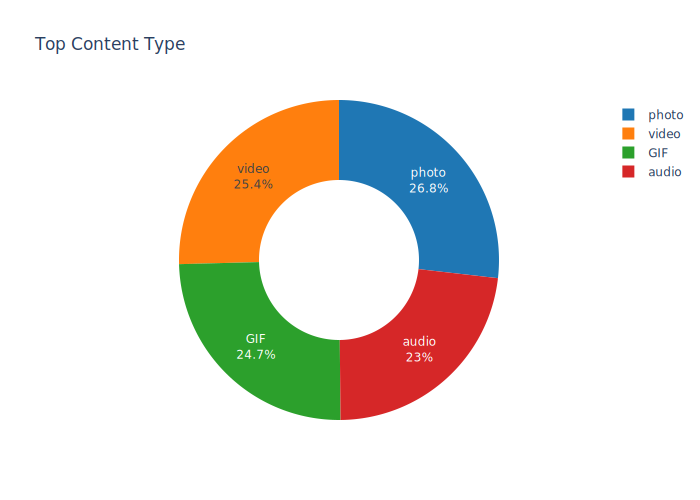

In [44]:
top_content_type_fig= px.pie(top_content_type, names = "Content_Type", 
                             values = "Count", 
                             hole = 0.5,
                             title = "Top Content Type",
                             color_discrete_sequence = px.colors.qualitative.D3)
top_content_type_fig.update_traces(textposition='inside', textinfo='percent+label')
top_content_type_fig.show(renderer="svg")

 **"Photo"** is the predominant content type **(26.8%**), followed closely by **"Video"** **(25.4%)**.

# Popular Content Type in Each Top 5 Category

In [45]:
df_in_top5= df.loc[df.Category.isin(["animals","science","healthy eating","technology","food"])]
df_in_top5_counts = df_in_top5.groupby(["Category","Content_Type"]).size().reset_index(name='Count')
max_indices  = df_in_top5_counts.groupby('Category')['Count'].idxmax()
max_rows = df_in_top5_counts.loc[max_indices].reset_index(drop= True)
max_rows

,Category,Content_Type,Count
0,animals,photo,674
1,food,video,490
2,healthy eating,audio,503
3,science,video,544
4,technology,audio,556


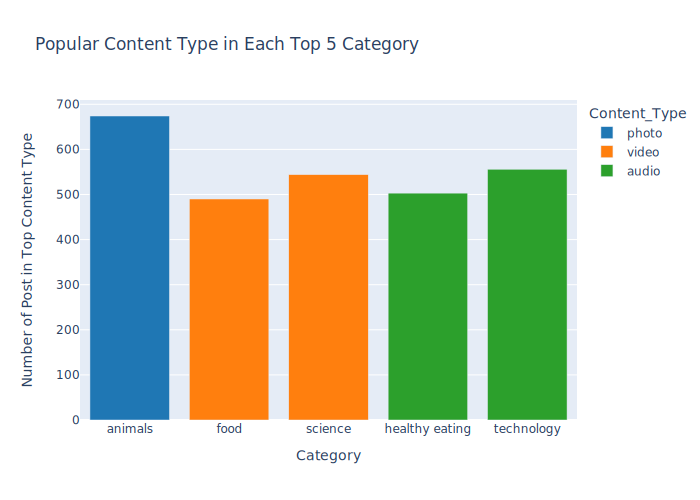

In [46]:
top_content_type_in_top5_cat_fig = px.bar(max_rows, 
                                          x='Category', 
                                          y='Count', 
                                          color='Content_Type',
                                          color_discrete_sequence= px.colors.qualitative.D3, 
                                          title='Popular Content Type in Each Top 5 Category')
top_content_type_in_top5_cat_fig.update_yaxes(title_text='Number of Post in Top Content Type')
top_content_type_in_top5_cat_fig.show(renderer="svg")

In **“animals”** category people used **photo content** the most , in **“food and science”** people used **video content** the most  and in **“healthy eating and technology”** people used the **audio content** the most.


# Unpopular Content Type in Each Top 5 Category

In [47]:
df_in_low5= df.loc[df.Category.isin(["animals","science","healthy eating","technology","food"])]
df_in_low5_counts = df_in_low5.groupby(["Category","Content_Type"]).size().reset_index(name='Count')
max_indices  = df_in_low5_counts.groupby('Category')['Count'].idxmin()
unpop_max_rows = df_in_low5_counts.loc[max_indices].reset_index(drop= True)
unpop_max_rows

,Category,Content_Type,Count
0,animals,video,311
1,food,photo,364
2,healthy eating,photo,332
3,science,GIF,368
4,technology,video,226


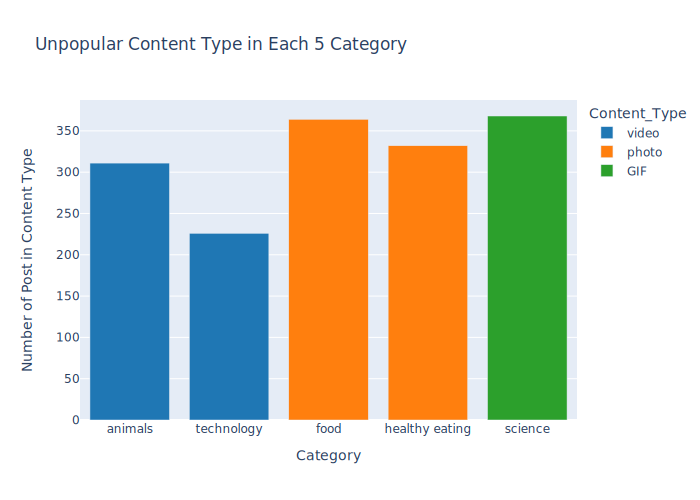

In [48]:
top_content_type_in_low5_cat_fig = px.bar(unpop_max_rows, 
                                          x='Category', 
                                          y='Count', 
                                          color='Content_Type',
                                          color_discrete_sequence= px.colors.qualitative.D3,
                                          title = "Unpopular Content Type in Each 5 Category")
top_content_type_in_low5_cat_fig.update_yaxes(title_text='Number of Post in Content Type')
top_content_type_in_low5_cat_fig.show(renderer="svg")

In “animals and technology” category people used video content the least , in “food and healthy eating” people used **photo content** the least and in **“science”** people used the **GIF content** the least.


# User Sentiment

In [49]:
sentiment= df.groupby('Sentiment').size().sort_index(ascending = False).reset_index().rename(columns={0: 'Count'})
sentiment

,Sentiment,Count
0,positive,13807
1,neutral,3071
2,negative,7695


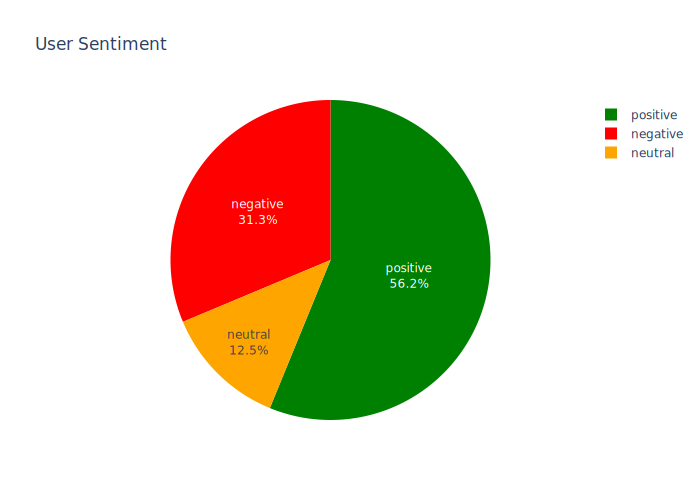

In [50]:
custom_sentiment_colors = ['green', 'red', 'orange']
sentiment_fig = px.pie(sentiment, names = "Sentiment", values = "Count", color_discrete_sequence = custom_sentiment_colors, title = "User Sentiment"  )
sentiment_fig.update_traces(textposition='inside', textinfo='percent+label')
sentiment_fig.show(renderer="svg")

Approximately **56%** express **positive sentiments**, indicating satisfaction or approval with the content. Around **31%** of the reactions convey **negative sentiments**, suggesting dissatisfaction or disagreement. Additionally, about **12%** of the reactions are **neutral**, indicating a lack of strong emotion or opinion.
